In [14]:
from graph_tool.all import * 
import geopandas as gpd
import networkx as nx
import momepy
import os
import time
os.chdir('..')



def graph_from_geojson(filename,node_col_front,node_col_tail,edge_col,prop_edge_col):
    '''
        Input:
            filename: string -> name.geojson
            name of node column front: string
            name of node column tail: string
            name of edge column
            name of property column
        Output:
            graph-tool graph
    '''
    gdf = gpd.read_file(filename)
    G = Graph()
    G.add_edge_list(gdf[[node_col_front,node_col_tail]].values)
    v_number_people_prop = G.new_vertex_property('int')
    G.vp['number_people'] = v_number_people_prop
    id_prop = G.new_edge_property('int')
    G.ep['id'] = id_prop
    length_prop = G.new_edge_property('float')
    G.ep['length'] = length_prop
    for v,uv in G.items():
        uv['id'] = gdf[gdf[node_col_front] == e.source()][gdf[node_col_tail] == e.target()][edge_col].values[0]
        uv['length'] = gdf[gdf[node_col_front] == e.source()][gdf[node_col_tail] == e.target()][prop_edge_col].values[0]
        v['number_people'] = np.random(1)
    return G


In [15]:
dir_ = '/home/aamad/Desktop/phd/codice/city-pro'

t0 = time.time()
#bolo = gpd.read_file(os.path.join(dir_,"bologna-provincia.geojson"))
t1 = time.time()
#print('attributes geopandas:', bolo)
print('Time elapsed reading gpd:', t1-t0)
print('Time elapsed creation nx from gpd:', t1-t0)
t0 = time.time()
G = graph_from_geojson(os.path.join(dir_,"bologna-provincia.geojson"),'poly_nF','poly_nT','poly_cid','poly_length')
t1 = time.time()
print('Time elapsed creation gt from nx:', t1-t0)
print('graph-tool dict:`n',G.__dict__)


Time elapsed reading gpd: 2.1696090698242188e-05
Time elapsed creation nx from gpd: 2.1696090698242188e-05


AttributeError: 'Graph' object has no attribute 'items'

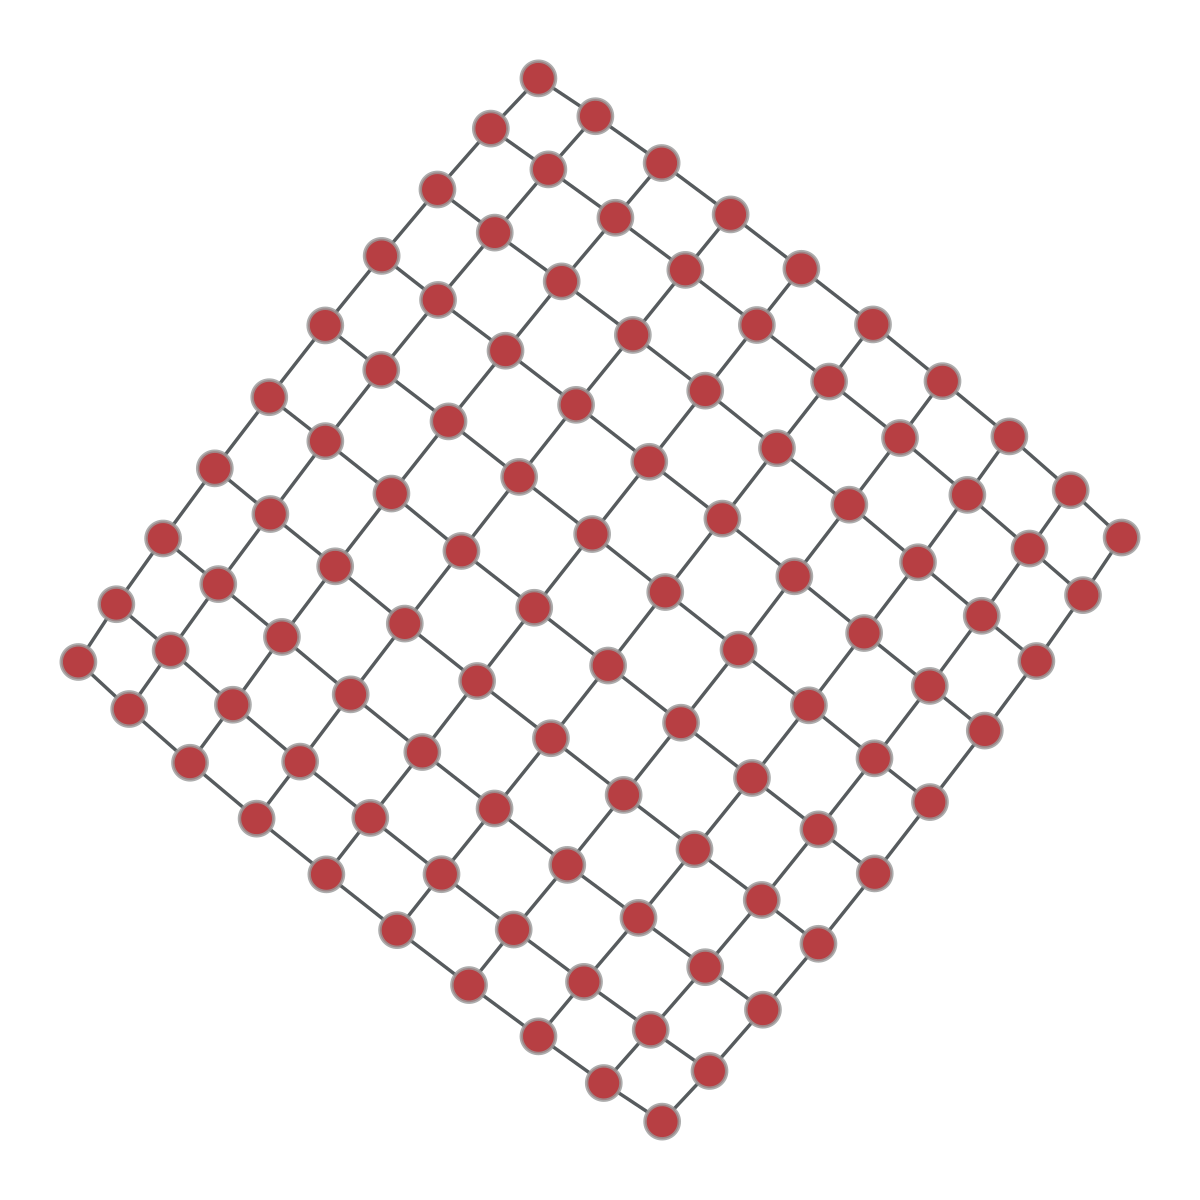

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fe3b00f9c10, at 0x7fe3af1dcf90>

In [7]:
from graph_tool.all import * 
import numpy as np
G = lattice([10,10])
time_spent = G.new_edge_property('float')
G.ep['time_spent'] = time_spent
for i in range(100):
    G.ep['time_spent'][G.edges()[i]] = np.random(1)
pos = sfdp_layout(G)
graph_draw(G,pos = pos,cooling_step = 1.01,epsilon = 1)

In [10]:
import sys 
import os
os.__dict__

{'__name__': 'os',
 '__doc__': "OS routines for NT or Posix depending on what system we're on.\n\nThis exports:\n  - all functions from posix or nt, e.g. unlink, stat, etc.\n  - os.path is either posixpath or ntpath\n  - os.name is either 'posix' or 'nt'\n  - os.curdir is a string representing the current directory (always '.')\n  - os.pardir is a string representing the parent directory (always '..')\n  - os.sep is the (or a most common) pathname separator ('/' or '\\\\')\n  - os.extsep is the extension separator (always '.')\n  - os.altsep is the alternate pathname separator (None or '/')\n  - os.pathsep is the component separator used in $PATH etc\n  - os.linesep is the line separator in text files ('\\r' or '\\n' or '\\r\\n')\n  - os.defpath is the default search path for executables\n  - os.devnull is the file path of the null device ('/dev/null', etc.)\n\nPrograms that import and use 'os' stand a better chance of being\nportable between different platforms.  Of course, they must 

In [27]:
os.environ.keys()

KeysView(environ({'BAMF_DESKTOP_FILE_HINT': '/var/lib/snapd/desktop/applications/code_code.desktop', 'CHROME_DESKTOP': 'code-url-handler.desktop', 'CONDA_DEFAULT_ENV': 'gt', 'CONDA_EXE': '/home/aamad/anaconda3/bin/conda', 'CONDA_PREFIX': '/home/aamad/anaconda3/envs/gt', 'CONDA_PROMPT_MODIFIER': '(gt) ', 'CONDA_PYTHON_EXE': '/home/aamad/anaconda3/bin/python', 'CONDA_SHLVL': '2', 'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/1000/bus', 'DESKTOP_SESSION': 'ubuntu', 'DISPLAY': 'localhost:0.0', 'ELECTRON_NO_ATTACH_CONSOLE': '1', 'GDK_BACKEND': 'x11', 'GDK_PIXBUF_MODULEDIR': '/snap/code/143/usr/lib/x86_64-linux-gnu/gdk-pixbuf-2.0/2.10.0/loaders', 'GDK_PIXBUF_MODULE_FILE': '/home/aamad/snap/code/common/.cache/gdk-pixbuf-loaders.cache', 'GDMSESSION': 'ubuntu', 'GIO_LAUNCHED_DESKTOP_FILE': '/var/lib/snapd/desktop/applications/code_code.desktop', 'GIO_LAUNCHED_DESKTOP_FILE_PID': '5155', 'GIO_MODULE_DIR': '/home/aamad/snap/code/common/.cache/gio-modules', 'GJS_DEBUG_OUTPUT': 'stderr', 'GJS_DEB